# Exploratory Data Analysis (EDA)

**Objective:**  
Explore the F1 race data CSV file to understand:
- What kind of data is available
- Data structure and types
- Missing values and data quality issues
- Discrepancies and inconsistencies
- Statistical distributions
- Relationships between variables


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


## 1. Load Data

Let's load the CSV file and get basic information about the dataset.


In [2]:
# Load the CSV file
csv_path = "../data/2023_Monaco_Race_20251116_165413.csv"

print(f"Loading data from: {csv_path}")
print("This may take a moment for large files...")

# Load data with chunking for large files
try:
    # First, let's check file size and read in chunks if needed
    df = pd.read_csv(csv_path, low_memory=False)
    print(f"✅ Data loaded successfully!")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
except Exception as e:
    print(f"❌ Error loading data: {e}")
    raise


Loading data from: ../data/2023_Monaco_Race_20251116_165413.csv
This may take a moment for large files...
✅ Data loaded successfully!
Shape: 982,330 rows × 65 columns


## 2. Basic Dataset Information


In [3]:
# Display basic information
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"\nTotal Rows: {len(df):,}")
print(f"Total Columns: {len(df.columns)}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColumn Names ({len(df.columns)} total):")
print("-" * 80)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


DATASET OVERVIEW

Total Rows: 982,330
Total Columns: 65
Memory Usage: 1174.31 MB

Column Names (65 total):
--------------------------------------------------------------------------------
 1. Date
 2. SessionTime
 3. DriverAhead
 4. DistanceToDriverAhead
 5. Time
 6. RPM
 7. Speed
 8. nGear
 9. Throttle
10. Brake
11. DRS
12. Source
13. Distance
14. RelativeDistance
15. Status_x
16. X
17. Y
18. Z
19. DriverID
20. Driver
21. LapNumber
22. LapTime
23. Sector1Time
24. Sector2Time
25. Sector3Time
26. Sector1SessionTime
27. Sector2SessionTime
28. Sector3SessionTime
29. LapStartTime
30. LapStartDate
31. PitOutTime
32. PitInTime
33. IsPersonalBest
34. Compound
35. TyreLife
36. FreshTyre
37. Stint
38. TrackStatus
39. Position_x
40. Deleted
41. DeletedReason
42. LapTime_seconds
43. Sector2Time_seconds
44. Sector3Time_seconds
45. Sector2SessionTime_seconds
46. Sector3SessionTime_seconds
47. LapStartTime_seconds
48. Time_seconds
49. Sector1Time_seconds
50. Sector1SessionTime_seconds
51. PitInTime_

In [4]:
# Display first few rows
print("\n" + "=" * 80)
print("FIRST 5 ROWS")
print("=" * 80)
df.head()



FIRST 5 ROWS


,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,FirstName,LastName,TeamName,GridPosition,Position_y,Points,Status_y,Q1,Q2,Q3
0,2023-05-28 13:03:03.927000,3722.95,NaN,0.066667,3807.435,10058.716787,0.0,1,16.0,True,...,Max,Verstappen,Red Bull Racing,1.0,1.0,25.0,Finished,NaN,NaN,NaN
1,2023-05-28 13:03:03.927000,3722.95,NaN,0.000000,3808.724,9551.783309,0.0,1,25.0,False,...,Fernando,Alonso,Aston Martin,2.0,2.0,18.0,Finished,NaN,NaN,NaN
2,2023-05-28 13:03:03.927000,3722.95,NaN,0.000000,3812.305,10395.508211,0.0,1,38.0,True,...,Charles,Leclerc,Ferrari,6.0,6.0,8.0,Finished,NaN,NaN,NaN
3,2023-05-28 13:03:03.927000,3722.95,NaN,0.000000,3810.587,10236.883379,0.0,1,30.0,False,...,Carlos,Sainz,Ferrari,4.0,8.0,4.0,Finished,NaN,NaN,NaN
4,2023-05-28 13:03:03.927000,3722.95,NaN,0.000000,3843.289,11255.425011,0.0,1,24.0,False,...,Nico,Hulkenberg,Haas F1 Team,18.0,17.0,0.0,Lapped,NaN,NaN,NaN


In [5]:
# Display data types
print("=" * 80)
print("DATA TYPES")
print("=" * 80)
dtype_info = df.dtypes.to_frame('Data Type')
dtype_info['Non-Null Count'] = df.count()
dtype_info['Null Count'] = df.isnull().sum()
dtype_info['Null Percentage'] = (df.isnull().sum() / len(df) * 100).round(2)
print(dtype_info.to_string())


DATA TYPES
                           Data Type  Non-Null Count  Null Count  Null Percentage
Date                          object          982330           0             0.00
SessionTime                  float64          982330           0             0.00
DriverAhead                  float64          931830       50500             5.14
DistanceToDriverAhead        float64          982330           0             0.00
Time                         float64          982330           0             0.00
RPM                          float64          982330           0             0.00
Speed                        float64          982330           0             0.00
nGear                          int64          982330           0             0.00
Throttle                     float64          982330           0             0.00
Brake                           bool          982330           0             0.00
DRS                            int64          982330           0             0.00
Sourc

## 3. Missing Values Analysis


In [6]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Non-Missing Count': df.notna().sum()
})

# Sort by missing percentage (descending)
missing_data = missing_data.sort_values('Missing Percentage', ascending=False)

print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)
print(f"\nColumns with missing values: {(missing_data['Missing Count'] > 0).sum()} out of {len(df.columns)}")
print(f"\nTop 20 columns with most missing values:")
print("-" * 80)
print(missing_data[missing_data['Missing Count'] > 0].head(20).to_string(index=False))


MISSING VALUES ANALYSIS

Columns with missing values: 26 out of 65

Top 20 columns with most missing values:
--------------------------------------------------------------------------------
                    Column  Missing Count  Missing Percentage  Non-Missing Count
                        Q3         982330              100.00                  0
                        Q2         982330              100.00                  0
                        Q1         982330              100.00                  0
             DeletedReason         963100               98.04              19230
        PitOutTime_seconds         955298               97.25              27032
                PitOutTime         955298               97.25              27032
         PitInTime_seconds         948704               96.58              33626
                 PitInTime         948704               96.58              33626
               DriverAhead          50500                5.14             931830


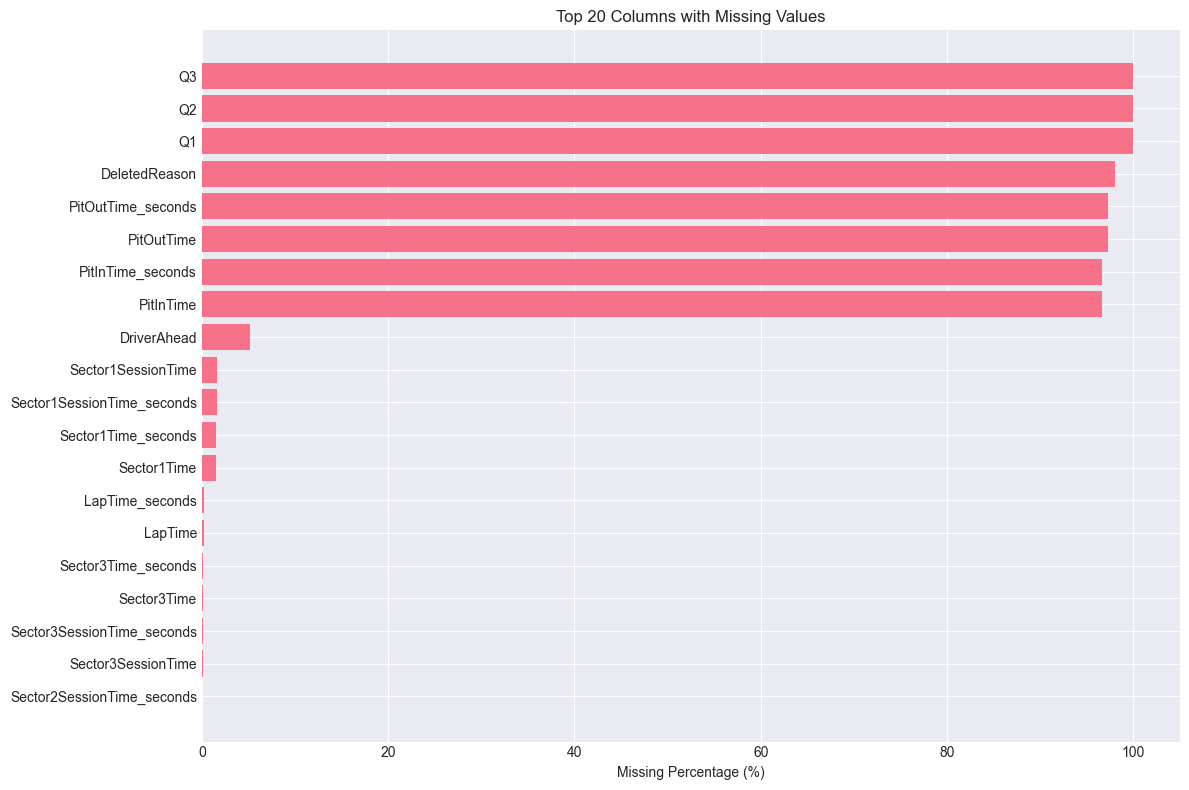

In [7]:
# Visualize missing values
cols_with_missing = missing_data[missing_data['Missing Count'] > 0].head(20)

if len(cols_with_missing) > 0:
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(cols_with_missing)), cols_with_missing['Missing Percentage'].values)
    plt.yticks(range(len(cols_with_missing)), cols_with_missing['Column'].values)
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 20 Columns with Missing Values')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")


## 4. Statistical Summary


In [8]:
# Statistical summary for numerical columns
print("=" * 80)
print("STATISTICAL SUMMARY (Numerical Columns)")
print("=" * 80)
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"\nNumerical columns: {len(numerical_cols)}")
print("\nSummary Statistics:")
print("-" * 80)
df[numerical_cols].describe()


STATISTICAL SUMMARY (Numerical Columns)

Numerical columns: 48

Summary Statistics:
--------------------------------------------------------------------------------


,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,DRS,Distance,...,PitInTime_seconds,PitOutTime_seconds,SessionTime_seconds,DriverNumber,GridPosition,Position_y,Points,Q1,Q2,Q3
count,982330.000000,931830.000000,982330.000000,982330.000000,982330.000000,982330.000000,982330.000000,982330.000000,982330.000000,982330.000000,...,33626.000000,27032.000000,982330.000000,982330.000000,982330.000000,982330.000000,982330.000000,0.0,0.0,0.0
mean,6966.243989,29.320108,297.106504,7009.515257,8919.684604,138.580433,3.472028,41.110046,0.229185,129966.365207,...,7419.777705,7444.057155,6966.243989,28.393659,10.429084,10.317308,5.193540,NaN,NaN,NaN
std,1889.984925,23.410678,403.445384,1893.067509,2009.648369,64.839928,2.694846,40.605289,1.428833,73257.856164,...,1432.638060,1325.046200,1889.984925,23.247170,5.795724,5.665137,7.249887,NaN,NaN,NaN
min,3722.950000,1.000000,0.000000,3807.435000,2013.000000,0.000000,0.000000,0.000000,0.000000,-0.017234,...,3811.449000,3842.058000,3722.950000,1.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN
25%,5328.853000,14.000000,44.045278,5365.267000,7394.000000,83.106474,2.000000,0.000000,0.000000,65944.641442,...,7164.702000,7188.889000,5328.853000,11.000000,5.000000,5.000000,0.000000,NaN,NaN,NaN
50%,6949.457000,22.000000,137.576529,6999.284000,9199.000000,127.000000,3.000000,31.000000,0.000000,133530.402096,...,7966.843000,7991.062000,6949.457000,22.000000,10.000000,10.000000,1.000000,NaN,NaN,NaN
75%,8592.702000,44.000000,386.062639,8642.535000,10702.835817,187.874926,5.000000,85.000000,0.000000,193409.726946,...,8076.873000,8093.591000,8592.702000,44.000000,16.000000,15.000000,10.000000,NaN,NaN,NaN
max,10334.387000,81.000000,3990.629722,10334.387000,13461.000000,291.000000,128.000000,104.000000,14.000000,256009.452216,...,9977.057000,9761.702000,10334.387000,81.000000,20.000000,20.000000,25.000000,NaN,NaN,NaN


In [9]:
# Statistical summary for categorical columns
print("=" * 80)
print("STATISTICAL SUMMARY (Categorical Columns)")
print("=" * 80)
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {len(categorical_cols)}")

if len(categorical_cols) > 0:
    print("\nUnique values per categorical column:")
    print("-" * 80)
    for col in categorical_cols:
        unique_count = df[col].nunique()
        print(f"{col:30s}: {unique_count:6,} unique values")
        if unique_count <= 20:
            print(f"  Values: {list(df[col].dropna().unique())}")


STATISTICAL SUMMARY (Categorical Columns)

Categorical columns: 14

Unique values per categorical column:
--------------------------------------------------------------------------------
Date                          : 50,401 unique values
Source                        :      3 unique values
  Values: ['interpolation', 'car', 'pos']
Status_x                      :      1 unique values
  Values: ['OnTrack']
DriverID                      :     20 unique values
  Values: ['VER', 'ALO', 'LEC', 'SAI', 'HUL', 'STR', 'TSU', 'HAM', 'DEV', 'MAG', 'ZHO', 'BOT', 'PER', 'OCO', 'ALB', 'PIA', 'SAR', 'GAS', 'NOR', 'RUS']
Driver                        :     20 unique values
  Values: ['VER', 'ALO', 'LEC', 'SAI', 'HUL', 'STR', 'TSU', 'HAM', 'DEV', 'MAG', 'ZHO', 'BOT', 'PER', 'OCO', 'ALB', 'PIA', 'SAR', 'GAS', 'NOR', 'RUS']
LapStartDate                  :  1,495 unique values
IsPersonalBest                :      2 unique values
  Values: [False, True]
Compound                      :      5 unique values

## 5. Data Quality Checks - Discrepancies and Issues


In [10]:
# Check for duplicate rows
print("=" * 80)
print("DUPLICATE ROWS CHECK")
print("=" * 80)
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count:,}")
print(f"Percentage of duplicates: {(duplicate_count / len(df) * 100):.4f}%")

if duplicate_count > 0:
    print("\n⚠️  WARNING: Duplicate rows found!")
    print("Sample duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("✅ No duplicate rows found")


DUPLICATE ROWS CHECK
Total duplicate rows: 0
Percentage of duplicates: 0.0000%
✅ No duplicate rows found


In [11]:
# Check for inconsistencies in key fields
print("=" * 80)
print("DATA CONSISTENCY CHECKS")
print("=" * 80)

issues_found = []

# Check 1: DriverID vs Driver consistency
if 'DriverID' in df.columns and 'Driver' in df.columns:
    driver_mismatch = df[df['DriverID'] != df['Driver']]
    if len(driver_mismatch) > 0:
        issues_found.append(f"DriverID/Driver mismatch: {len(driver_mismatch):,} rows")
        print(f"⚠️  DriverID/Driver mismatch: {len(driver_mismatch):,} rows")
    else:
        print("✅ DriverID and Driver columns are consistent")

# Check 2: Position_x vs Position_y consistency (if both exist)
if 'Position_x' in df.columns and 'Position_y' in df.columns:
    position_mismatch = df[(df['Position_x'].notna()) & (df['Position_y'].notna()) & 
                           (df['Position_x'] != df['Position_y'])]
    if len(position_mismatch) > 0:
        issues_found.append(f"Position_x/Position_y mismatch: {len(position_mismatch):,} rows")
        print(f"⚠️  Position_x/Position_y mismatch: {len(position_mismatch):,} rows")
        print(f"   Sample mismatches:")
        print(position_mismatch[['DriverID', 'Position_x', 'Position_y', 'LapNumber']].head(10))
    else:
        print("✅ Position_x and Position_y are consistent")

# Check 3: Status_x vs Status_y consistency (if both exist)
if 'Status_x' in df.columns and 'Status_y' in df.columns:
    status_mismatch = df[(df['Status_x'].notna()) & (df['Status_y'].notna()) & 
                         (df['Status_x'] != df['Status_y'])]
    if len(status_mismatch) > 0:
        issues_found.append(f"Status_x/Status_y mismatch: {len(status_mismatch):,} rows")
        print(f"⚠️  Status_x/Status_y mismatch: {len(status_mismatch):,} rows")
    else:
        print("✅ Status_x and Status_y are consistent")

# Check 4: Negative values where they shouldn't exist
if 'Speed' in df.columns:
    negative_speed = df[df['Speed'] < 0]
    if len(negative_speed) > 0:
        issues_found.append(f"Negative Speed values: {len(negative_speed):,} rows")
        print(f"⚠️  Negative Speed values: {len(negative_speed):,} rows")
    else:
        print("✅ No negative Speed values")

if 'RPM' in df.columns:
    negative_rpm = df[df['RPM'] < 0]
    if len(negative_rpm) > 0:
        issues_found.append(f"Negative RPM values: {len(negative_rpm):,} rows")
        print(f"⚠️  Negative RPM values: {len(negative_rpm):,} rows")
    else:
        print("✅ No negative RPM values")

# Check 5: LapNumber consistency
if 'LapNumber' in df.columns:
    negative_lap = df[df['LapNumber'] < 0]
    if len(negative_lap) > 0:
        issues_found.append(f"Negative LapNumber values: {len(negative_lap):,} rows")
        print(f"⚠️  Negative LapNumber values: {len(negative_lap):,} rows")
    
    max_lap = df['LapNumber'].max()
    print(f"✅ LapNumber range: {df['LapNumber'].min():.0f} to {max_lap:.0f}")

# Summary
print("\n" + "=" * 80)
if issues_found:
    print(f"⚠️  TOTAL ISSUES FOUND: {len(issues_found)}")
    for issue in issues_found:
        print(f"  - {issue}")
else:
    print("✅ No major consistency issues found!")


DATA CONSISTENCY CHECKS
✅ DriverID and Driver columns are consistent
⚠️  Position_x/Position_y mismatch: 565,560 rows
   Sample mismatches:
   DriverID  Position_x  Position_y  LapNumber
3       SAI         4.0         8.0        1.0
4       HUL        20.0        17.0        1.0
5       STR        17.0        20.0        1.0
6       TSU         9.0        15.0        1.0
7       HAM         5.0         4.0        1.0
9       MAG        16.0        19.0        1.0
10      ZHO        19.0        13.0        1.0
11      BOT        14.0        11.0        1.0
12      PER        18.0        16.0        1.0
14      ALB        13.0        14.0        1.0
⚠️  Status_x/Status_y mismatch: 982,330 rows
✅ No negative Speed values
✅ No negative RPM values
✅ LapNumber range: 1 to 78

⚠️  TOTAL ISSUES FOUND: 2
  - Position_x/Position_y mismatch: 565,560 rows
  - Status_x/Status_y mismatch: 982,330 rows


In [12]:
# Check for outliers in key numerical columns
print("=" * 80)
print("OUTLIER DETECTION (Using IQR Method)")
print("=" * 80)

key_numerical_cols = ['Speed', 'RPM', 'Throttle', 'Brake', 'LapTime_seconds', 'Distance']

outliers_summary = {}

for col in key_numerical_cols:
    if col in df.columns:
        # Get the column data and handle boolean types
        col_data = df[col].copy()
        
        # Convert boolean to numeric if needed (for quantile calculation)
        if pd.api.types.is_bool_dtype(col_data):
            col_data = col_data.astype(int)
        elif col_data.dtype == 'object':
            # Try to convert to numeric, skip if not possible
            try:
                col_data = pd.to_numeric(col_data, errors='raise')
            except (ValueError, TypeError):
                print(f"\n{col}:")
                print(f"  ⚠️  Skipping outlier detection - non-numeric data type: {df[col].dtype}")
                continue
        
        # Ensure data is numeric for quantile calculations
        if not pd.api.types.is_numeric_dtype(col_data):
            # Try one more time to convert
            try:
                col_data = pd.to_numeric(col_data, errors='coerce')
                if col_data.isna().all():
                    print(f"\n{col}:")
                    print(f"  ⚠️  Skipping outlier detection - cannot convert to numeric")
                    continue
            except (ValueError, TypeError):
                print(f"\n{col}:")
                print(f"  ⚠️  Skipping outlier detection - non-numeric data type")
                continue
        
        # Calculate quantiles with error handling
        try:
            Q1 = col_data.quantile(0.25)
            Q3 = col_data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(col_data < lower_bound) | (col_data > upper_bound)]
            outlier_count = len(outliers)
            outlier_pct = (outlier_count / len(df) * 100)
            
            outliers_summary[col] = {
                'count': outlier_count,
                'percentage': outlier_pct,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'min': col_data.min(),
                'max': col_data.max()
            }
            
            print(f"\n{col}:")
            print(f"  Normal range: [{lower_bound:.2f}, {upper_bound:.2f}]")
            print(f"  Actual range: [{col_data.min():.2f}, {col_data.max():.2f}]")
            print(f"  Outliers: {outlier_count:,} ({outlier_pct:.2f}%)")
        except (TypeError, ValueError) as e:
            print(f"\n{col}:")
            print(f"  ⚠️  Cannot calculate outliers - data type issue: {df[col].dtype}")
            print(f"  Error: {str(e)}")

# Create summary DataFrame
outliers_df = pd.DataFrame(outliers_summary).T
print("\n" + "=" * 80)
print("OUTLIERS SUMMARY")
print("=" * 80)
print(outliers_df[['count', 'percentage']].to_string())


OUTLIER DETECTION (Using IQR Method)

Speed:
  Normal range: [-74.05, 345.03]
  Actual range: [0.00, 291.00]
  Outliers: 0 (0.00%)

RPM:
  Normal range: [2430.75, 15666.09]
  Actual range: [2013.00, 13461.00]
  Outliers: 3 (0.00%)

Throttle:
  Normal range: [-127.50, 212.50]
  Actual range: [0.00, 104.00]
  Outliers: 0 (0.00%)

Brake:
  Normal range: [-1.50, 2.50]
  Actual range: [0.00, 1.00]
  Outliers: 0 (0.00%)

LapTime_seconds:
  Normal range: [54.39, 118.00]
  Actual range: [75.65, 146.65]
  Outliers: 20,378 (2.07%)

Distance:
  Normal range: [-125252.99, 384607.36]
  Actual range: [-0.02, 256009.45]
  Outliers: 0 (0.00%)

OUTLIERS SUMMARY
                   count  percentage
Speed                0.0    0.000000
RPM                  3.0    0.000305
Throttle             0.0    0.000000
Brake                0.0    0.000000
LapTime_seconds  20378.0    2.074456
Distance             0.0    0.000000


## 6. Key Variables Analysis


In [13]:
# Analyze key variables
print("=" * 80)
print("KEY VARIABLES ANALYSIS")
print("=" * 80)

# Drivers
if 'Driver' in df.columns:
    print(f"\n📊 DRIVERS:")
    print(f"  Total unique drivers: {df['Driver'].nunique()}")
    print(f"  Drivers: {sorted(df['Driver'].dropna().unique())}")
    print(f"\n  Data points per driver:")
    driver_counts = df['Driver'].value_counts()
    print(driver_counts.to_string())

# Teams
if 'TeamName' in df.columns:
    print(f"\n📊 TEAMS:")
    print(f"  Total unique teams: {df['TeamName'].nunique()}")
    print(f"  Teams: {sorted(df['TeamName'].dropna().unique())}")
    print(f"\n  Data points per team:")
    team_counts = df['TeamName'].value_counts()
    print(team_counts.to_string())

# Tire Compounds
if 'Compound' in df.columns:
    print(f"\n📊 TIRE COMPOUNDS:")
    print(f"  Unique compounds: {df['Compound'].nunique()}")
    print(f"  Compounds: {sorted(df['Compound'].dropna().unique())}")
    print(f"\n  Distribution:")
    compound_counts = df['Compound'].value_counts()
    print(compound_counts.to_string())

# Lap Numbers
if 'LapNumber' in df.columns:
    print(f"\n📊 LAP NUMBERS:")
    print(f"  Total laps: {df['LapNumber'].max():.0f}")
    print(f"  Lap range: {df['LapNumber'].min():.0f} to {df['LapNumber'].max():.0f}")
    print(f"  Data points per lap (sample):")
    lap_counts = df['LapNumber'].value_counts().sort_index().head(10)
    print(lap_counts.to_string())


KEY VARIABLES ANALYSIS

📊 DRIVERS:
  Total unique drivers: 20
  Drivers: ['ALB', 'ALO', 'BOT', 'DEV', 'GAS', 'HAM', 'HUL', 'LEC', 'MAG', 'NOR', 'OCO', 'PER', 'PIA', 'RUS', 'SAI', 'SAR', 'STR', 'TSU', 'VER', 'ZHO']

  Data points per driver:
Driver
ALB    50383
SAR    50332
ZHO    50324
SAI    50261
GAS    50254
LEC    50249
DEV    50214
RUS    50168
PER    50149
HUL    50145
HAM    50070
OCO    50055
BOT    49995
ALO    49987
PIA    49882
TSU    49837
NOR    49811
VER    49781
MAG    47645
STR    32788

📊 TEAMS:
  Total unique teams: 10
  Teams: ['Alfa Romeo', 'AlphaTauri', 'Alpine', 'Aston Martin', 'Ferrari', 'Haas F1 Team', 'McLaren', 'Mercedes', 'Red Bull Racing', 'Williams']

  Data points per team:
TeamName
Williams           100715
Ferrari            100510
Alfa Romeo         100319
Alpine             100309
Mercedes           100238
AlphaTauri         100051
Red Bull Racing     99930
McLaren             99693
Haas F1 Team        97790
Aston Martin        82775

📊 TIRE COMPOUNDS:

## 7. Temporal Analysis


In [14]:
# Analyze temporal aspects
print("=" * 80)
print("TEMPORAL ANALYSIS")
print("=" * 80)

# Date analysis
if 'Date' in df.columns:
    try:
        df['Date'] = pd.to_datetime(df['Date'])
        print(f"\n📅 DATE RANGE:")
        print(f"  Start: {df['Date'].min()}")
        print(f"  End: {df['Date'].max()}")
        print(f"  Duration: {df['Date'].max() - df['Date'].min()}")
        print(f"  Total unique timestamps: {df['Date'].nunique():,}")
    except Exception as e:
        print(f"⚠️  Could not parse Date column: {e}")

# SessionTime analysis
if 'SessionTime_seconds' in df.columns:
    print(f"\n⏱️  SESSION TIME:")
    print(f"  Min: {df['SessionTime_seconds'].min():.2f} seconds")
    print(f"  Max: {df['SessionTime_seconds'].max():.2f} seconds")
    print(f"  Duration: {(df['SessionTime_seconds'].max() - df['SessionTime_seconds'].min()) / 60:.2f} minutes")
    
    # Check for time gaps
    time_sorted = df['SessionTime_seconds'].sort_values()
    time_diffs = time_sorted.diff()
    large_gaps = time_diffs[time_diffs > 10]  # Gaps larger than 10 seconds
    if len(large_gaps) > 0:
        print(f"  ⚠️  Found {len(large_gaps)} time gaps > 10 seconds")
    else:
        print(f"  ✅ No significant time gaps detected")


TEMPORAL ANALYSIS

📅 DATE RANGE:
  Start: 2023-05-28 13:03:03.927000
  End: 2023-05-28 14:53:15.364000
  Duration: 0 days 01:50:11.437000
  Total unique timestamps: 50,401

⏱️  SESSION TIME:
  Min: 3722.95 seconds
  Max: 10334.39 seconds
  Duration: 110.19 minutes
  ✅ No significant time gaps detected


## 8. Visualizations


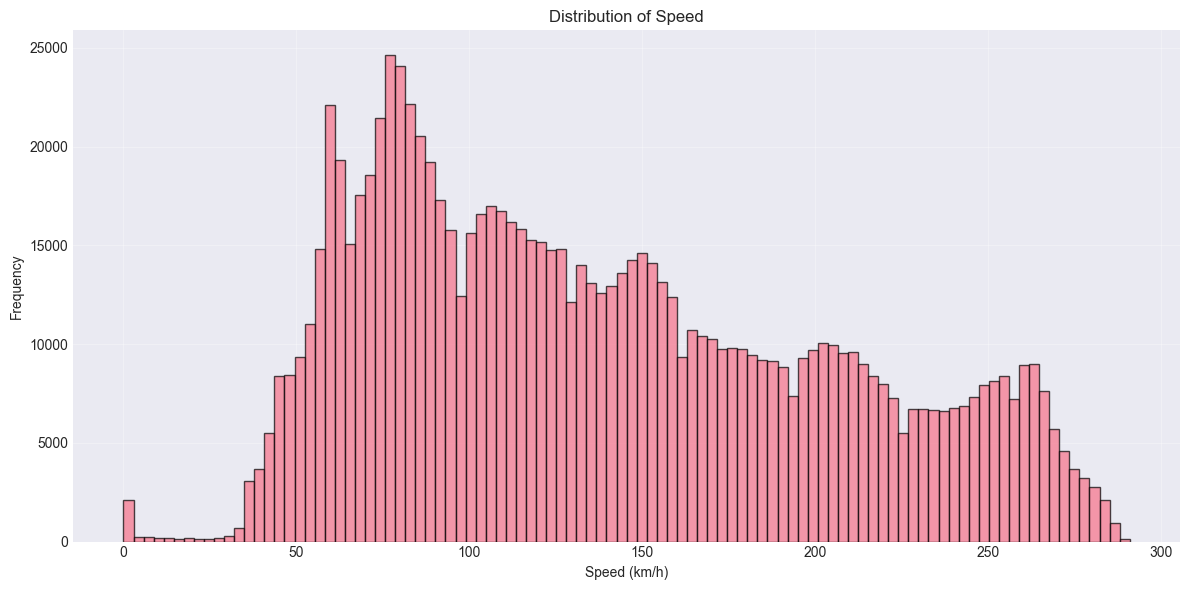

Speed Statistics:
  Mean: 138.58 km/h
  Median: 127.00 km/h
  Std: 64.84 km/h
  Min: 0.00 km/h
  Max: 291.00 km/h


In [15]:
# Distribution of Speed
if 'Speed' in df.columns:
    plt.figure(figsize=(12, 6))
    plt.hist(df['Speed'].dropna(), bins=100, edgecolor='black', alpha=0.7)
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Speed')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Speed Statistics:")
    print(f"  Mean: {df['Speed'].mean():.2f} km/h")
    print(f"  Median: {df['Speed'].median():.2f} km/h")
    print(f"  Std: {df['Speed'].std():.2f} km/h")
    print(f"  Min: {df['Speed'].min():.2f} km/h")
    print(f"  Max: {df['Speed'].max():.2f} km/h")


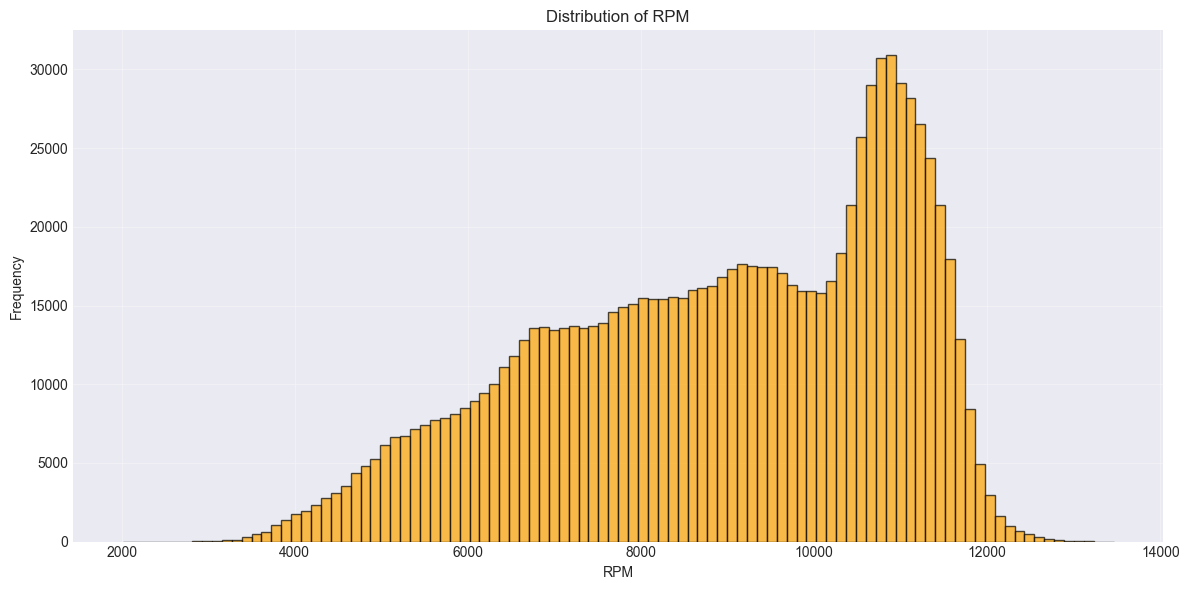

RPM Statistics:
  Mean: 8919.68
  Median: 9199.00
  Std: 2009.65
  Min: 2013.00
  Max: 13461.00


In [16]:
# Distribution of RPM
if 'RPM' in df.columns:
    plt.figure(figsize=(12, 6))
    plt.hist(df['RPM'].dropna(), bins=100, edgecolor='black', alpha=0.7, color='orange')
    plt.xlabel('RPM')
    plt.ylabel('Frequency')
    plt.title('Distribution of RPM')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"RPM Statistics:")
    print(f"  Mean: {df['RPM'].mean():.2f}")
    print(f"  Median: {df['RPM'].median():.2f}")
    print(f"  Std: {df['RPM'].std():.2f}")
    print(f"  Min: {df['RPM'].min():.2f}")
    print(f"  Max: {df['RPM'].max():.2f}")


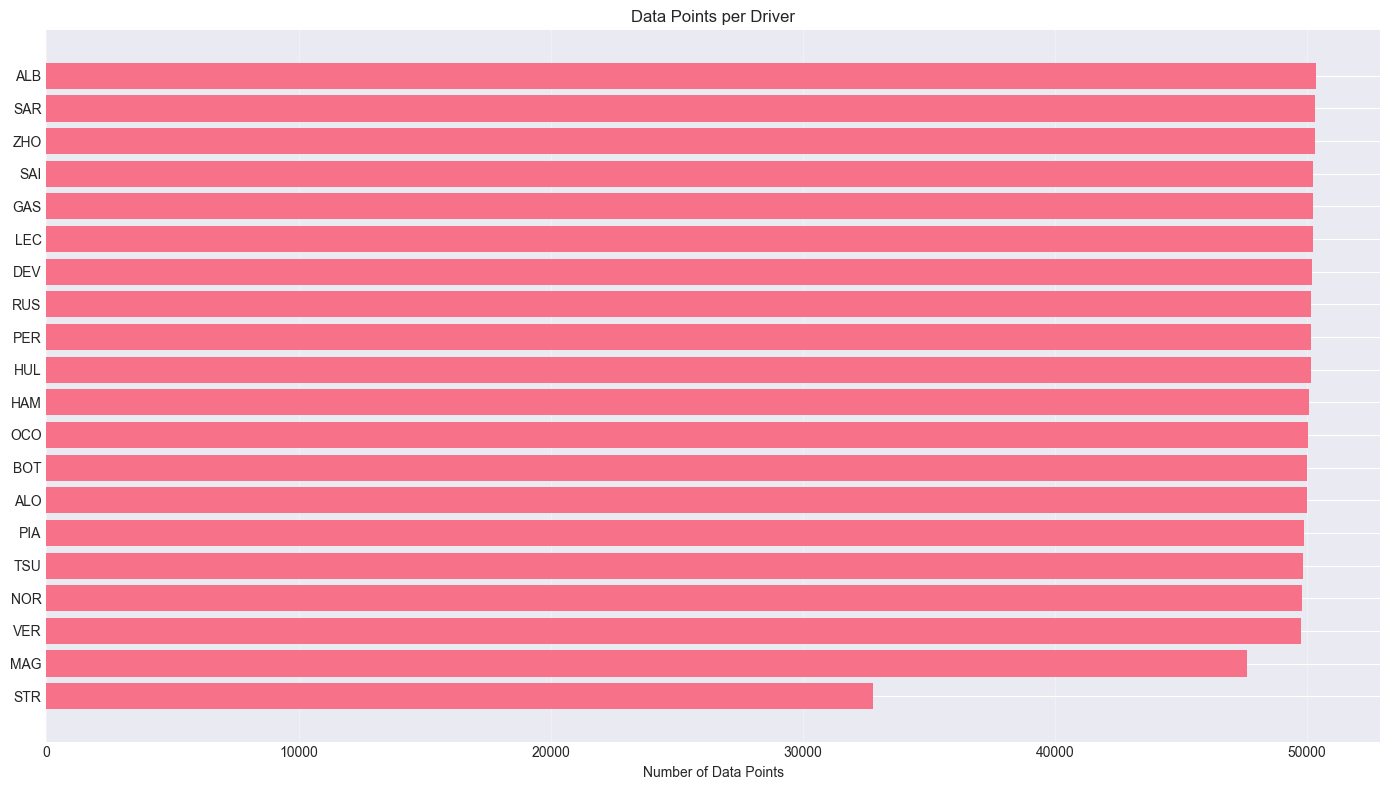

In [17]:
# Driver distribution
if 'Driver' in df.columns:
    plt.figure(figsize=(14, 8))
    driver_counts = df['Driver'].value_counts().sort_values(ascending=True)
    plt.barh(range(len(driver_counts)), driver_counts.values)
    plt.yticks(range(len(driver_counts)), driver_counts.index)
    plt.xlabel('Number of Data Points')
    plt.title('Data Points per Driver')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()


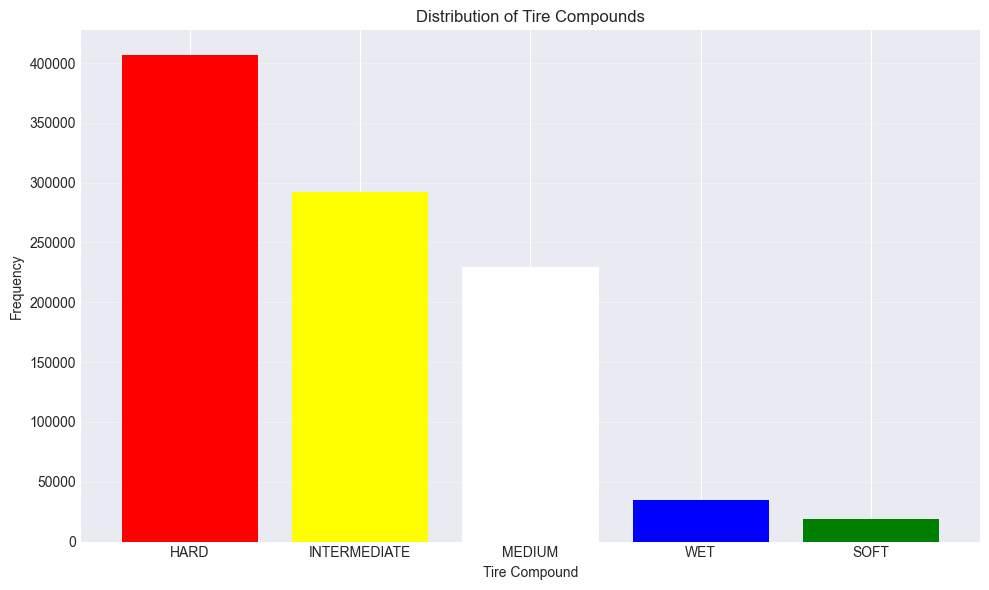

In [18]:
# Tire compound distribution
if 'Compound' in df.columns:
    plt.figure(figsize=(10, 6))
    compound_counts = df['Compound'].value_counts()
    plt.bar(compound_counts.index, compound_counts.values, color=['red', 'yellow', 'white', 'blue', 'green'])
    plt.xlabel('Tire Compound')
    plt.ylabel('Frequency')
    plt.title('Distribution of Tire Compounds')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()


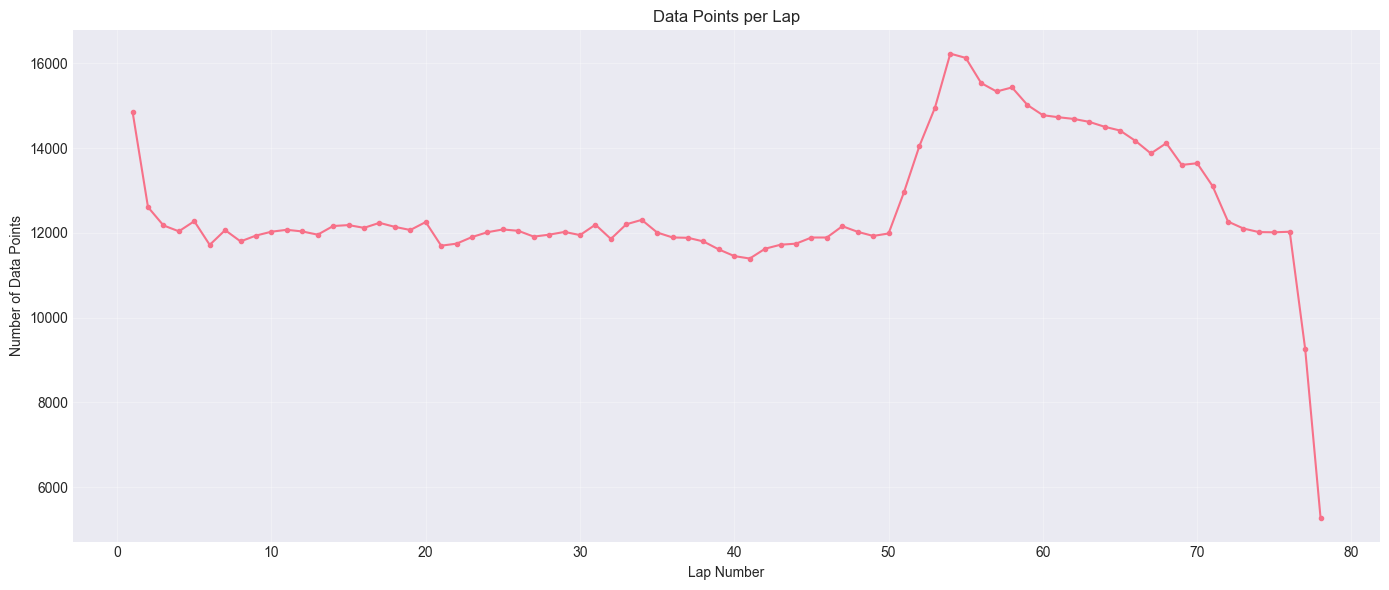

In [19]:
# Lap distribution
if 'LapNumber' in df.columns:
    plt.figure(figsize=(14, 6))
    lap_counts = df['LapNumber'].value_counts().sort_index()
    plt.plot(lap_counts.index, lap_counts.values, marker='o', markersize=3)
    plt.xlabel('Lap Number')
    plt.ylabel('Number of Data Points')
    plt.title('Data Points per Lap')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


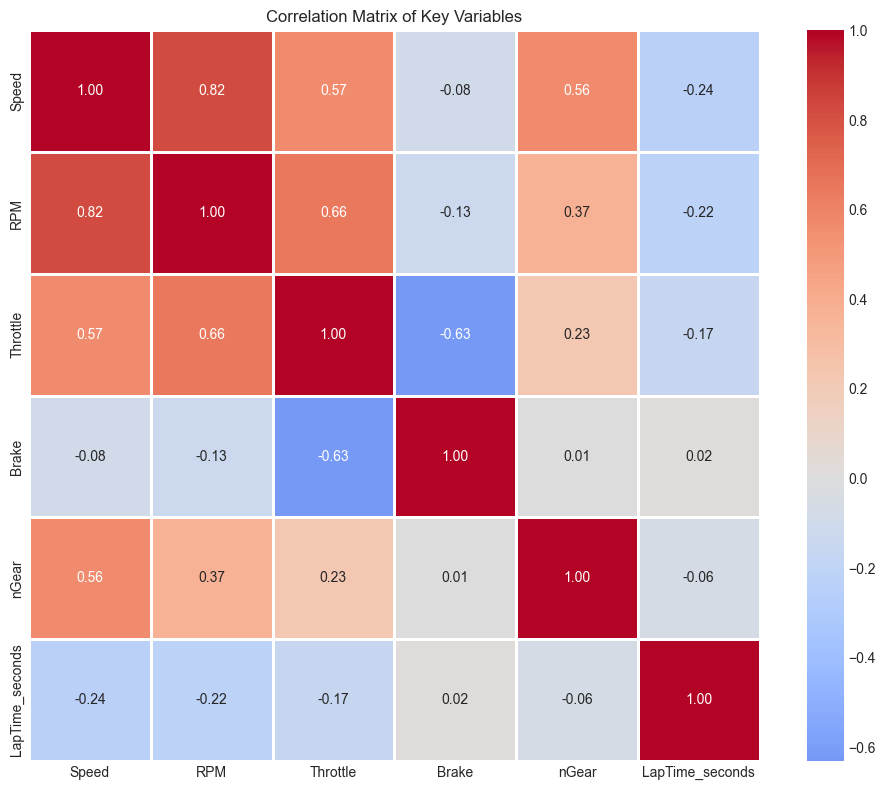

In [20]:
# Correlation heatmap for key numerical variables
key_vars = ['Speed', 'RPM', 'Throttle', 'Brake', 'nGear', 'LapTime_seconds']
available_vars = [v for v in key_vars if v in df.columns]

if len(available_vars) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[available_vars].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1)
    plt.title('Correlation Matrix of Key Variables')
    plt.tight_layout()
    plt.show()


## 9. Summary of Findings


In [21]:
# Generate comprehensive summary
print("=" * 80)
print("EDA SUMMARY REPORT")
print("=" * 80)

print(f"\n📊 DATASET OVERVIEW:")
print(f"  • Total rows: {len(df):,}")
print(f"  • Total columns: {len(df.columns)}")
print(f"  • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n📋 DATA TYPES:")
print(f"  • Numerical columns: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"  • Categorical columns: {len(df.select_dtypes(include=['object']).columns)}")

print(f"\n❌ MISSING VALUES:")
missing_cols = (df.isnull().sum() > 0).sum()
print(f"  • Columns with missing values: {missing_cols} out of {len(df.columns)}")
if missing_cols > 0:
    top_missing = df.isnull().sum().nlargest(5)
    print(f"  • Top 5 columns with most missing values:")
    for col, count in top_missing.items():
        pct = (count / len(df) * 100)
        print(f"    - {col}: {count:,} ({pct:.2f}%)")

print(f"\n🔍 DATA QUALITY:")
print(f"  • Duplicate rows: {df.duplicated().sum():,}")
print(f"  • Outliers detected: See outlier analysis above")

if 'Driver' in df.columns:
    print(f"\n👥 DRIVERS:")
    print(f"  • Unique drivers: {df['Driver'].nunique()}")
    
if 'LapNumber' in df.columns:
    print(f"\n🏁 LAPS:")
    print(f"  • Total laps: {df['LapNumber'].max():.0f}")

print(f"\n✅ KEY FINDINGS:")
print(f"  • Dataset appears to contain F1 telemetry data from 2023 Monaco Grand Prix")
print(f"  • Data includes: Speed, RPM, Throttle, Brake, Position, Lap times, Tire info, etc.")
print(f"  • Check the consistency checks above for any discrepancies found")

print("\n" + "=" * 80)
print("EDA Complete!")
print("=" * 80)


EDA SUMMARY REPORT

📊 DATASET OVERVIEW:
  • Total rows: 982,330
  • Total columns: 65
  • Memory usage: 1104.05 MB

📋 DATA TYPES:
  • Numerical columns: 48
  • Categorical columns: 13

❌ MISSING VALUES:
  • Columns with missing values: 26 out of 65
  • Top 5 columns with most missing values:
    - Q1: 982,330 (100.00%)
    - Q2: 982,330 (100.00%)
    - Q3: 982,330 (100.00%)
    - DeletedReason: 963,100 (98.04%)
    - PitOutTime: 955,298 (97.25%)

🔍 DATA QUALITY:
  • Duplicate rows: 0
  • Outliers detected: See outlier analysis above

👥 DRIVERS:
  • Unique drivers: 20

🏁 LAPS:
  • Total laps: 78

✅ KEY FINDINGS:
  • Dataset appears to contain F1 telemetry data from 2023 Monaco Grand Prix
  • Data includes: Speed, RPM, Throttle, Brake, Position, Lap times, Tire info, etc.
  • Check the consistency checks above for any discrepancies found

EDA Complete!


## 10. Pit Stop Analysis - Why are Pit Stop Columns Mostly Empty?


In [22]:
# Analyze pit stop data
print("=" * 80)
print("PIT STOP DATA ANALYSIS")
print("=" * 80)

pit_cols = ['PitInTime', 'PitOutTime', 'PitInTime_seconds', 'PitOutTime_seconds', 'Stint']

# Check pit stop occurrences
if 'PitInTime_seconds' in df.columns:
    pit_in_count = df['PitInTime_seconds'].notna().sum()
    pit_out_count = df['PitOutTime_seconds'].notna().sum()
    
    print(f"\n📊 PIT STOP OCCURRENCES:")
    print(f"  Rows with PitInTime data: {pit_in_count:,} ({pit_in_count/len(df)*100:.2f}%)")
    print(f"  Rows with PitOutTime data: {pit_out_count:,} ({pit_out_count/len(df)*100:.2f}%)")
    
    # Count unique pit stops per driver
    if 'Driver' in df.columns:
        print(f"\n📊 PIT STOPS PER DRIVER:")
        driver_pit_stops = df[df['PitInTime_seconds'].notna()].groupby('Driver').size()
        print(f"  Total unique pit stop events: {len(df[df['PitInTime_seconds'].notna()].groupby(['Driver', 'LapNumber']).size())}")
        print(f"\n  Pit stops per driver:")
        for driver, count in driver_pit_stops.items():
            print(f"    {driver}: {count:,} data points")
        
        # Count unique pit stop laps per driver
        print(f"\n  Unique laps with pit stops per driver:")
        driver_pit_laps = df[df['PitInTime_seconds'].notna()].groupby('Driver')['LapNumber'].nunique()
        for driver, laps in driver_pit_laps.items():
            print(f"    {driver}: {laps:.0f} lap(s)")

# Analyze Stint column (which indicates tire stint)
if 'Stint' in df.columns:
    print(f"\n📊 STINT ANALYSIS (Tire Stint Number):")
    print(f"  Unique stints: {sorted(df['Stint'].dropna().unique())}")
    stint_counts = df['Stint'].value_counts().sort_index()
    print(f"\n  Data points per stint:")
    print(stint_counts.to_string())
    
    # Stints per driver
    if 'Driver' in df.columns:
        print(f"\n  Number of stints per driver:")
        driver_stints = df.groupby('Driver')['Stint'].max()
        for driver, max_stint in driver_stints.items():
            print(f"    {driver}: {max_stint:.0f} stints")

print(f"\n💡 INSIGHT:")
print(f"  Pit stop columns are mostly empty because:")
print(f"  - F1 cars typically pit 1-3 times per race (Monaco is a street circuit)")
print(f"  - Pit stop data only exists for the brief moments when cars are in the pit lane")
print(f"  - Most of the race time is spent on track, not in pits")
print(f"  - This is NORMAL behavior - pit stops are rare events in telemetry data")


PIT STOP DATA ANALYSIS

📊 PIT STOP OCCURRENCES:
  Rows with PitInTime data: 33,626 (3.42%)
  Rows with PitOutTime data: 27,032 (2.75%)

📊 PIT STOPS PER DRIVER:
  Total unique pit stop events: 38

  Pit stops per driver:
    ALB: 1,627 data points
    ALO: 1,808 data points
    BOT: 829 data points
    DEV: 897 data points
    GAS: 1,652 data points
    HAM: 1,617 data points
    HUL: 2,904 data points
    LEC: 1,698 data points
    MAG: 2,215 data points
    NOR: 1,720 data points
    OCO: 1,582 data points
    PER: 4,492 data points
    PIA: 1,006 data points
    RUS: 896 data points
    SAI: 1,780 data points
    SAR: 2,388 data points
    STR: 788 data points
    TSU: 953 data points
    VER: 997 data points
    ZHO: 1,777 data points

  Unique laps with pit stops per driver:
    ALB: 2 lap(s)
    ALO: 2 lap(s)
    BOT: 1 lap(s)
    DEV: 1 lap(s)
    GAS: 2 lap(s)
    HAM: 2 lap(s)
    HUL: 3 lap(s)
    LEC: 2 lap(s)
    MAG: 2 lap(s)
    NOR: 2 lap(s)
    OCO: 2 lap(s)
    PER: 5 l

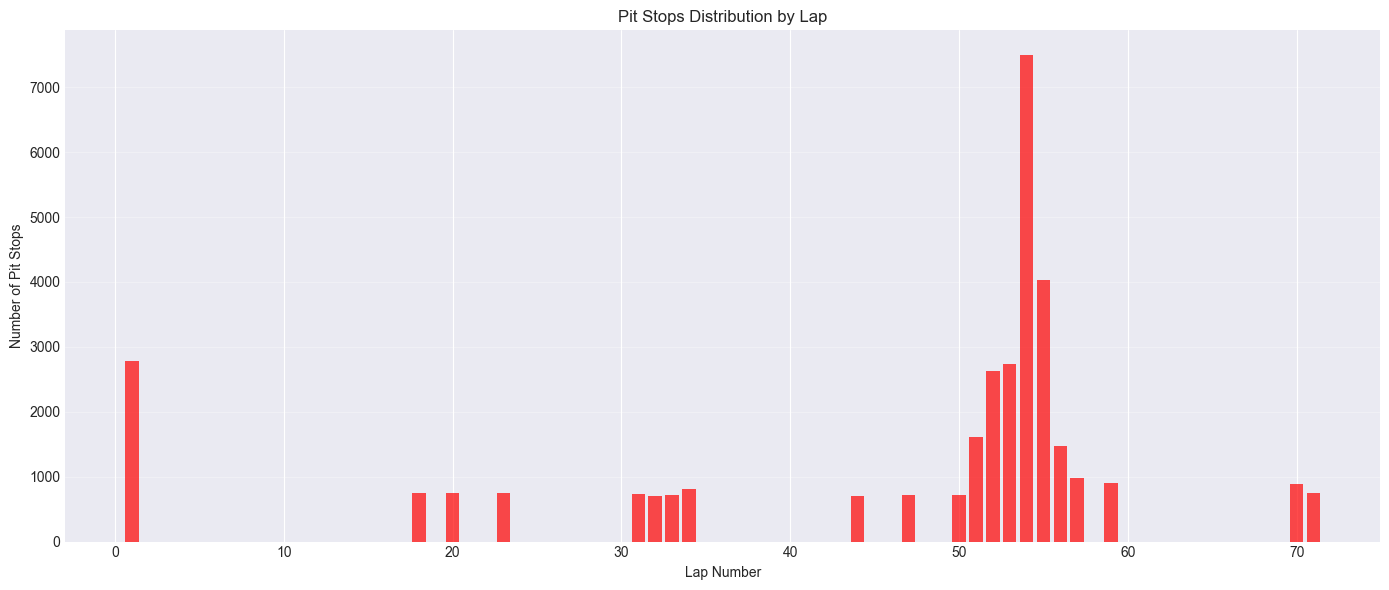

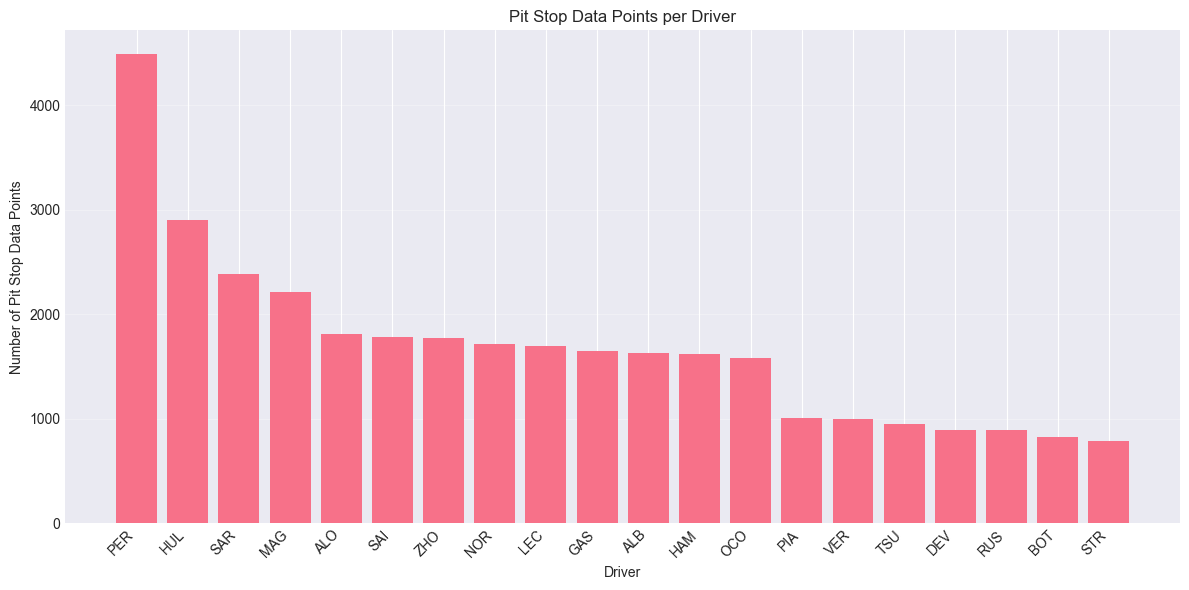

In [23]:
# Visualize pit stop distribution
if 'PitInTime_seconds' in df.columns and 'Driver' in df.columns:
    pit_data = df[df['PitInTime_seconds'].notna()].copy()
    
    if len(pit_data) > 0:
        # Pit stops by lap
        if 'LapNumber' in pit_data.columns:
            plt.figure(figsize=(14, 6))
            pit_laps = pit_data.groupby('LapNumber').size()
            plt.bar(pit_laps.index, pit_laps.values, color='red', alpha=0.7)
            plt.xlabel('Lap Number')
            plt.ylabel('Number of Pit Stops')
            plt.title('Pit Stops Distribution by Lap')
            plt.grid(True, alpha=0.3, axis='y')
            plt.tight_layout()
            plt.show()
        
        # Pit stops by driver
        plt.figure(figsize=(12, 6))
        driver_pits = pit_data['Driver'].value_counts()
        plt.bar(range(len(driver_pits)), driver_pits.values)
        plt.xticks(range(len(driver_pits)), driver_pits.index, rotation=45, ha='right')
        plt.xlabel('Driver')
        plt.ylabel('Number of Pit Stop Data Points')
        plt.title('Pit Stop Data Points per Driver')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
    else:
        print("No pit stop data to visualize")



        


## 11. Data Quality Assessment for Anomaly Detection


In [24]:
# Assess data quality for anomaly detection
print("=" * 80)
print("DATA QUALITY ASSESSMENT FOR ANOMALY DETECTION")
print("=" * 80)

# Define threshold for "good" data coverage (>= 90% non-null)
good_coverage_threshold = 0.90

# Calculate coverage for each column
coverage_analysis = pd.DataFrame({
    'Column': df.columns,
    'Non_Null_Count': df.notna().sum(),
    'Null_Count': df.isnull().sum(),
    'Coverage_Percentage': (df.notna().sum() / len(df) * 100),
    'Data_Type': df.dtypes
})

coverage_analysis['Good_Coverage'] = coverage_analysis['Coverage_Percentage'] >= (good_coverage_threshold * 100)
coverage_analysis = coverage_analysis.sort_values('Coverage_Percentage', ascending=False)

# Separate numerical and categorical
numerical_good = coverage_analysis[
    (coverage_analysis['Good_Coverage']) & 
    (coverage_analysis['Data_Type'].isin([np.number]))
]

categorical_good = coverage_analysis[
    (coverage_analysis['Good_Coverage']) & 
    (coverage_analysis['Data_Type'] == 'object')
]

print(f"\n✅ COLUMNS WITH GOOD DATA COVERAGE (≥{good_coverage_threshold*100:.0f}%):")
print(f"  Total: {len(coverage_analysis[coverage_analysis['Good_Coverage']])} columns")
print(f"  Numerical: {len(numerical_good)} columns")
print(f"  Categorical: {len(categorical_good)} columns")

print(f"\n📊 TOP NUMERICAL COLUMNS FOR ANOMALY DETECTION:")
print("-" * 80)
print(numerical_good[['Column', 'Coverage_Percentage', 'Data_Type']].head(20).to_string(index=False))

print(f"\n📊 TOP CATEGORICAL COLUMNS FOR ANOMALY DETECTION:")
print("-" * 80)
if len(categorical_good) > 0:
    print(categorical_good[['Column', 'Coverage_Percentage', 'Data_Type']].to_string(index=False))
else:
    print("  No categorical columns with good coverage")


DATA QUALITY ASSESSMENT FOR ANOMALY DETECTION

✅ COLUMNS WITH GOOD DATA COVERAGE (≥90%):
  Total: 57 columns
  Numerical: 0 columns
  Categorical: 12 columns

📊 TOP NUMERICAL COLUMNS FOR ANOMALY DETECTION:
--------------------------------------------------------------------------------
Empty DataFrame
Columns: [Column, Coverage_Percentage, Data_Type]
Index: []

📊 TOP CATEGORICAL COLUMNS FOR ANOMALY DETECTION:
--------------------------------------------------------------------------------
        Column  Coverage_Percentage Data_Type
      TeamName           100.000000    object
      LastName           100.000000    object
     FirstName           100.000000    object
      FullName           100.000000    object
      Compound           100.000000    object
      Status_y           100.000000    object
        Driver           100.000000    object
        Source           100.000000    object
      Status_x           100.000000    object
      DriverID           100.000000    object


## 12. Anomaly Detection Feasibility Analysis


In [25]:
# Identify potential anomalies we can detect
print("=" * 80)
print("ANOMALY DETECTION FEASIBILITY ANALYSIS")
print("=" * 80)

# Key telemetry features with good coverage
key_features = {
    'Speed': 'Vehicle speed anomalies (too fast/slow for track section)',
    'RPM': 'Engine RPM anomalies (over-revving, stalling)',
    'Throttle': 'Throttle anomalies (stuck open/closed)',
    'Brake': 'Brake anomalies (excessive braking, brake failure)',
    'nGear': 'Gear anomalies (wrong gear for speed)',
    'DRS': 'DRS system anomalies',
    'LapTime_seconds': 'Lap time anomalies (unusually slow/fast)',
    'Distance': 'Distance anomalies (tracking issues)',
    'TyreLife': 'Tire wear anomalies',
    'Position_x': 'Position anomalies'
}

print("\n🎯 POTENTIAL ANOMALIES TO DETECT:")
print("-" * 80)

feasible_features = []
for feature, description in key_features.items():
    if feature in df.columns:
        coverage = (df[feature].notna().sum() / len(df)) * 100
        if coverage >= 90:
            feasible_features.append(feature)
            print(f"  ✅ {feature:20s} - {description}")
            print(f"     Coverage: {coverage:.2f}%")
        else:
            print(f"  ⚠️  {feature:20s} - {description}")
            print(f"     Coverage: {coverage:.2f}% (LOW - may need imputation)")

print(f"\n📈 SUMMARY:")
print(f"  Features suitable for anomaly detection: {len(feasible_features)}")
print(f"  Recommended features: {', '.join(feasible_features[:10])}")


ANOMALY DETECTION FEASIBILITY ANALYSIS

🎯 POTENTIAL ANOMALIES TO DETECT:
--------------------------------------------------------------------------------
  ✅ Speed                - Vehicle speed anomalies (too fast/slow for track section)
     Coverage: 100.00%
  ✅ RPM                  - Engine RPM anomalies (over-revving, stalling)
     Coverage: 100.00%
  ✅ Throttle             - Throttle anomalies (stuck open/closed)
     Coverage: 100.00%
  ✅ Brake                - Brake anomalies (excessive braking, brake failure)
     Coverage: 100.00%
  ✅ nGear                - Gear anomalies (wrong gear for speed)
     Coverage: 100.00%
  ✅ DRS                  - DRS system anomalies
     Coverage: 100.00%
  ✅ LapTime_seconds      - Lap time anomalies (unusually slow/fast)
     Coverage: 99.75%
  ✅ Distance             - Distance anomalies (tracking issues)
     Coverage: 100.00%
  ✅ TyreLife             - Tire wear anomalies
     Coverage: 100.00%
  ✅ Position_x           - Position anomalies


In [26]:
# Analyze feature distributions for anomaly detection
print("=" * 80)
print("FEATURE DISTRIBUTION ANALYSIS FOR ANOMALY DETECTION")
print("=" * 80)

key_numerical_features = ['Speed', 'RPM', 'Throttle', 'Brake', 'nGear', 'LapTime_seconds', 'TyreLife']

print("\n📊 STATISTICAL PROPERTIES (Important for anomaly detection):")
print("-" * 80)

for feature in key_numerical_features:
    if feature in df.columns:
        coverage = (df[feature].notna().sum() / len(df)) * 100
        if coverage >= 90:
            data = df[feature].dropna()
            
            # Convert boolean to numeric if needed (for quantile calculation)
            # Check if data is boolean type or contains only boolean-like values
            if pd.api.types.is_bool_dtype(data):
                data = data.astype(int)
            elif data.dtype == 'object':
                # Try to convert to numeric, skip if not possible
                try:
                    data = pd.to_numeric(data, errors='raise')
                except (ValueError, TypeError):
                    print(f"\n{feature}:")
                    print(f"  Coverage: {coverage:.2f}%")
                    print(f"  ⚠️  Skipping statistical analysis - non-numeric data type: {data.dtype}")
                    continue
            # Ensure data is numeric for quantile calculations
            if not pd.api.types.is_numeric_dtype(data):
                # Try one more time to convert
                try:
                    data = pd.to_numeric(data, errors='coerce').dropna()
                    if len(data) == 0:
                        print(f"\n{feature}:")
                        print(f"  Coverage: {coverage:.2f}%")
                        print(f"  ⚠️  Skipping statistical analysis - cannot convert to numeric")
                        continue
                except (ValueError, TypeError):
                    print(f"\n{feature}:")
                    print(f"  Coverage: {coverage:.2f}%")
                    print(f"  ⚠️  Skipping statistical analysis - non-numeric data type")
                    continue
            
            cv = data.std() / data.mean() if data.mean() != 0 else 0  # Coefficient of variation
            
            print(f"\n{feature}:")
            print(f"  Coverage: {coverage:.2f}%")
            print(f"  Mean: {data.mean():.2f}")
            print(f"  Std: {data.std():.2f}")
            print(f"  CV (Coefficient of Variation): {cv:.4f} {'(High variance - good for anomaly detection)' if cv > 0.3 else '(Low variance)'}")
            print(f"  Min: {data.min():.2f}")
            print(f"  Max: {data.max():.2f}")
            print(f"  Skewness: {data.skew():.4f} {'(Skewed - consider log transform)' if abs(data.skew()) > 1 else '(Normal-like)'}")
            
            # Check for potential anomalies using IQR (only for numeric data)
            try:
                Q1 = data.quantile(0.25)
                Q3 = data.quantile(0.75)
                IQR = Q3 - Q1
                outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
                print(f"  Potential outliers (IQR method): {outliers:,} ({outliers/len(data)*100:.2f}%)")
            except (TypeError, ValueError) as e:
                print(f"  ⚠️  Cannot calculate IQR - data type issue: {data.dtype}")


FEATURE DISTRIBUTION ANALYSIS FOR ANOMALY DETECTION

📊 STATISTICAL PROPERTIES (Important for anomaly detection):
--------------------------------------------------------------------------------

Speed:
  Coverage: 100.00%
  Mean: 138.58
  Std: 64.84
  CV (Coefficient of Variation): 0.4679 (High variance - good for anomaly detection)
  Min: 0.00
  Max: 291.00
  Skewness: 0.4538 (Normal-like)
  Potential outliers (IQR method): 0 (0.00%)

RPM:
  Coverage: 100.00%
  Mean: 8919.68
  Std: 2009.65
  CV (Coefficient of Variation): 0.2253 (Low variance)
  Min: 2013.00
  Max: 13461.00
  Skewness: -0.4667 (Normal-like)
  Potential outliers (IQR method): 3 (0.00%)

Throttle:
  Coverage: 100.00%
  Mean: 41.11
  Std: 40.61
  CV (Coefficient of Variation): 0.9877 (High variance - good for anomaly detection)
  Min: 0.00
  Max: 104.00
  Skewness: 0.3585 (Normal-like)
  Potential outliers (IQR method): 0 (0.00%)

Brake:
  Coverage: 100.00%
  Mean: 0.30
  Std: 0.46
  CV (Coefficient of Variation): 1.5331

## 13. TyreLife Column Analysis


TYRELIFE COLUMN ANALYSIS

📊 BASIC STATISTICS:
  Data type: float64
  Total values: 982,330
  Non-null values: 982,330
  Null values: 0
  Coverage: 100.00%

📈 STATISTICAL SUMMARY:
  Mean: 18.77 laps
  Median: 16.00 laps
  Std: 13.94 laps
  Min: 1 laps
  Max: 56 laps
  25th percentile: 8.00 laps
  75th percentile: 27.00 laps

📋 SAMPLE VALUES (first 20 rows):
--------------------------------------------------------------------------------
Driver  LapNumber Compound  TyreLife  Stint
   VER        1.0   MEDIUM       1.0    1.0
   ALO        1.0     HARD       2.0    1.0
   LEC        1.0     HARD       1.0    1.0
   SAI        1.0     HARD       1.0    1.0
   HUL        1.0   MEDIUM       1.0    1.0
   STR        1.0     HARD       2.0    1.0
   TSU        1.0   MEDIUM       1.0    1.0
   HAM        1.0   MEDIUM       1.0    1.0
   DEV        1.0   MEDIUM       1.0    1.0
   MAG        1.0     HARD       1.0    1.0
   ZHO        1.0     SOFT       1.0    1.0
   BOT        1.0     HARD      

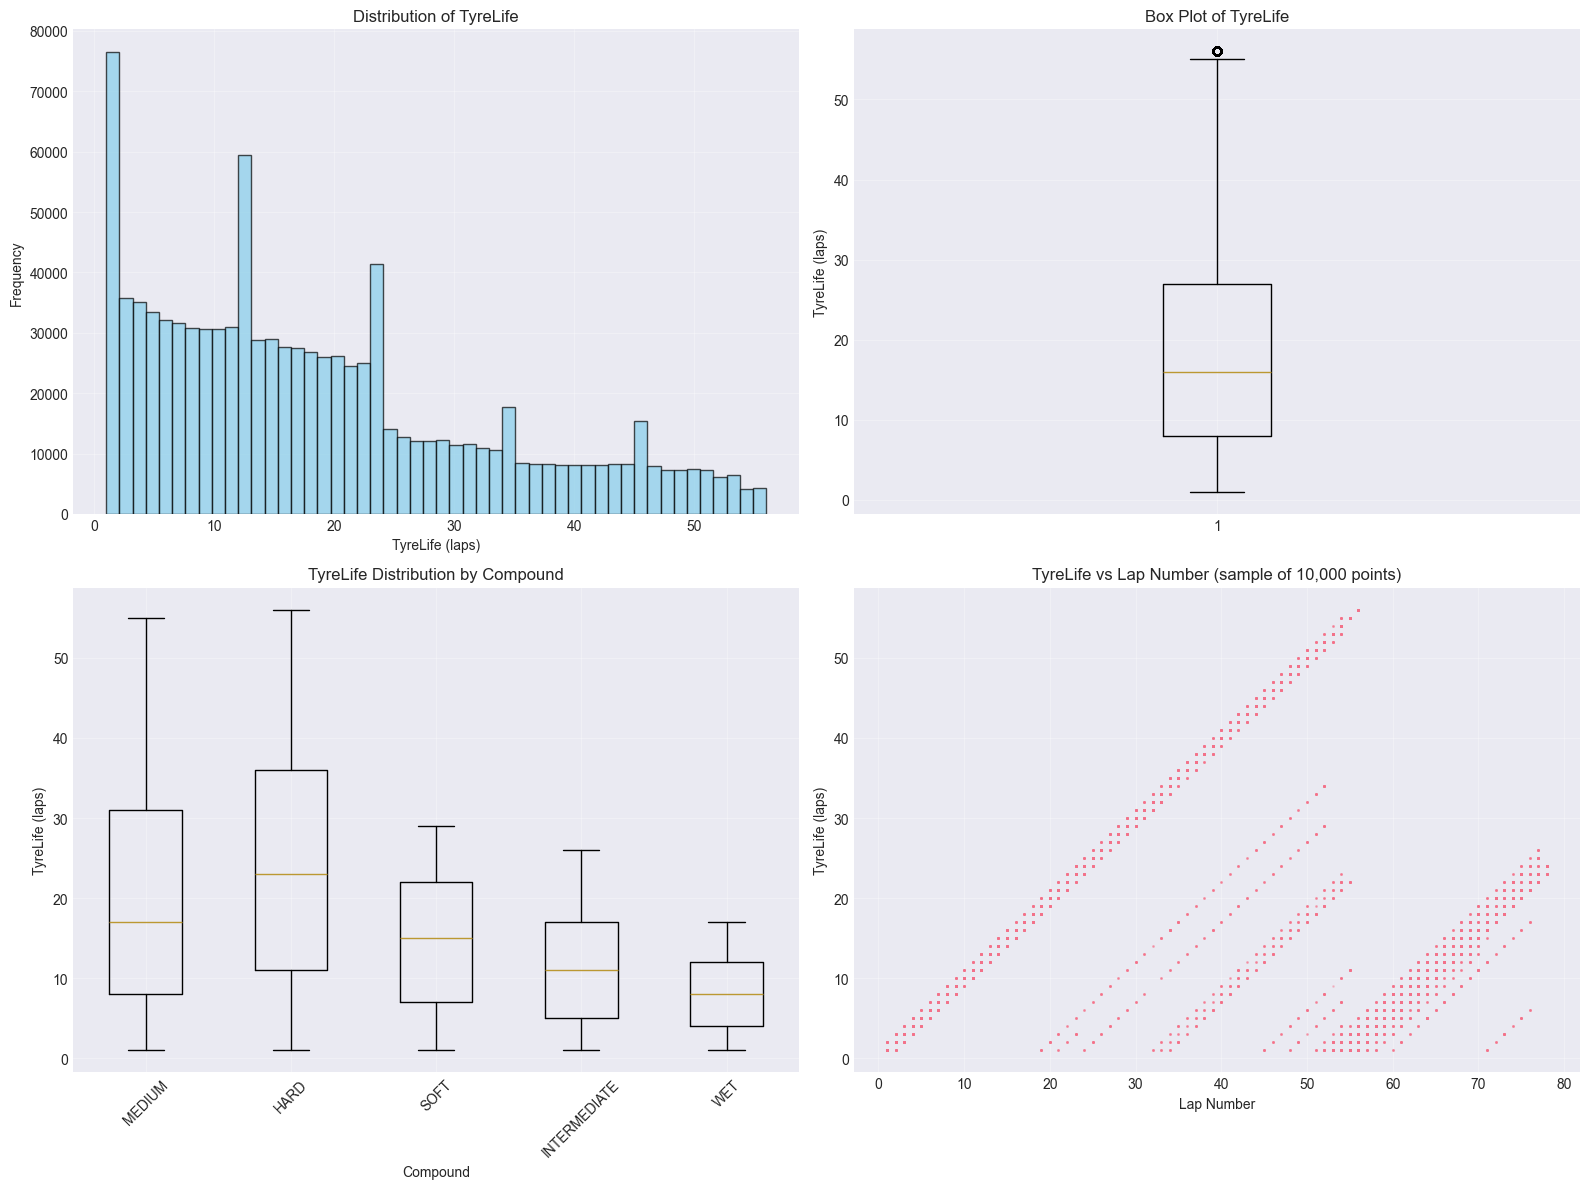


✅ TyreLife analysis complete!


In [27]:
# Analyze TyreLife column data
print("=" * 80)
print("TYRELIFE COLUMN ANALYSIS")
print("=" * 80)

if 'TyreLife' in df.columns:
    # Basic statistics
    print(f"\n📊 BASIC STATISTICS:")
    print(f"  Data type: {df['TyreLife'].dtype}")
    print(f"  Total values: {len(df['TyreLife']):,}")
    print(f"  Non-null values: {df['TyreLife'].notna().sum():,}")
    print(f"  Null values: {df['TyreLife'].isnull().sum():,}")
    print(f"  Coverage: {(df['TyreLife'].notna().sum() / len(df) * 100):.2f}%")
    
    print(f"\n📈 STATISTICAL SUMMARY:")
    print(f"  Mean: {df['TyreLife'].mean():.2f} laps")
    print(f"  Median: {df['TyreLife'].median():.2f} laps")
    print(f"  Std: {df['TyreLife'].std():.2f} laps")
    print(f"  Min: {df['TyreLife'].min():.0f} laps")
    print(f"  Max: {df['TyreLife'].max():.0f} laps")
    print(f"  25th percentile: {df['TyreLife'].quantile(0.25):.2f} laps")
    print(f"  75th percentile: {df['TyreLife'].quantile(0.75):.2f} laps")
    
    print(f"\n📋 SAMPLE VALUES (first 20 rows):")
    print("-" * 80)
    sample_data = df[['Driver', 'LapNumber', 'Compound', 'TyreLife', 'Stint']].head(20)
    print(sample_data.to_string(index=False))
    
    print(f"\n📋 UNIQUE VALUES:")
    print(f"  Unique TyreLife values: {sorted(df['TyreLife'].unique())}")
    print(f"\n  Value counts (top 20):")
    value_counts = df['TyreLife'].value_counts().sort_index().head(20)
    print(value_counts.to_string())
    
    # TyreLife by Compound
    if 'Compound' in df.columns:
        print(f"\n📊 TYRELIFE BY COMPOUND:")
        print("-" * 80)
        compound_tyre_stats = df.groupby('Compound')['TyreLife'].agg(['mean', 'median', 'min', 'max', 'std']).round(2)
        print(compound_tyre_stats.to_string())
    
    # TyreLife by Driver (sample)
    if 'Driver' in df.columns:
        print(f"\n📊 TYRELIFE BY DRIVER (sample - first 10 drivers):")
        print("-" * 80)
        driver_tyre_stats = df.groupby('Driver')['TyreLife'].agg(['mean', 'median', 'min', 'max']).round(2).head(10)
        print(driver_tyre_stats.to_string())
    
    # Distribution visualization
    print(f"\n📊 VISUALIZATIONS:")
    print("-" * 80)
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Histogram
    axes[0, 0].hist(df['TyreLife'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
    axes[0, 0].set_xlabel('TyreLife (laps)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution of TyreLife')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Box plot
    axes[0, 1].boxplot(df['TyreLife'].dropna(), vert=True)
    axes[0, 1].set_ylabel('TyreLife (laps)')
    axes[0, 1].set_title('Box Plot of TyreLife')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. TyreLife by Compound (box plot)
    if 'Compound' in df.columns:
        compounds = df['Compound'].unique()
        tyre_data_by_compound = [df[df['Compound'] == comp]['TyreLife'].dropna() for comp in compounds]
        axes[1, 0].boxplot(tyre_data_by_compound, labels=compounds)
        axes[1, 0].set_xlabel('Compound')
        axes[1, 0].set_ylabel('TyreLife (laps)')
        axes[1, 0].set_title('TyreLife Distribution by Compound')
        axes[1, 0].tick_params(axis='x', rotation=45)
        axes[1, 0].grid(True, alpha=0.3)
    
    # 4. TyreLife vs LapNumber (scatter sample)
    if 'LapNumber' in df.columns:
        # Sample data for visualization (too many points otherwise)
        sample_size = min(10000, len(df))
        sample_df = df.sample(n=sample_size, random_state=42)
        axes[1, 1].scatter(sample_df['LapNumber'], sample_df['TyreLife'], alpha=0.3, s=1)
        axes[1, 1].set_xlabel('Lap Number')
        axes[1, 1].set_ylabel('TyreLife (laps)')
        axes[1, 1].set_title(f'TyreLife vs Lap Number (sample of {sample_size:,} points)')
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ TyreLife analysis complete!")
else:
    print("❌ TyreLife column not found in dataset")
